In [66]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

In [4]:
df = pd.read_csv("weather delhi.csv")

In [5]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [6]:
df.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [7]:
df.columns = map(lambda x: x.strip(), df.columns)

In [8]:
df.columns

Index(['datetime_utc', '_conds', '_dewptm', '_fog', '_hail', '_heatindexm',
       '_hum', '_precipm', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wdire', '_wgustm',
       '_windchillm', '_wspdm'],
      dtype='object')

In [9]:
df._conds.value_counts

<bound method IndexOpsMixin.value_counts of 0         Smoke
1         Smoke
2         Smoke
3         Smoke
4         Smoke
          ...  
100985     Haze
100986     Haze
100987     Haze
100988     Haze
100989     Haze
Name: _conds, Length: 100990, dtype: object>

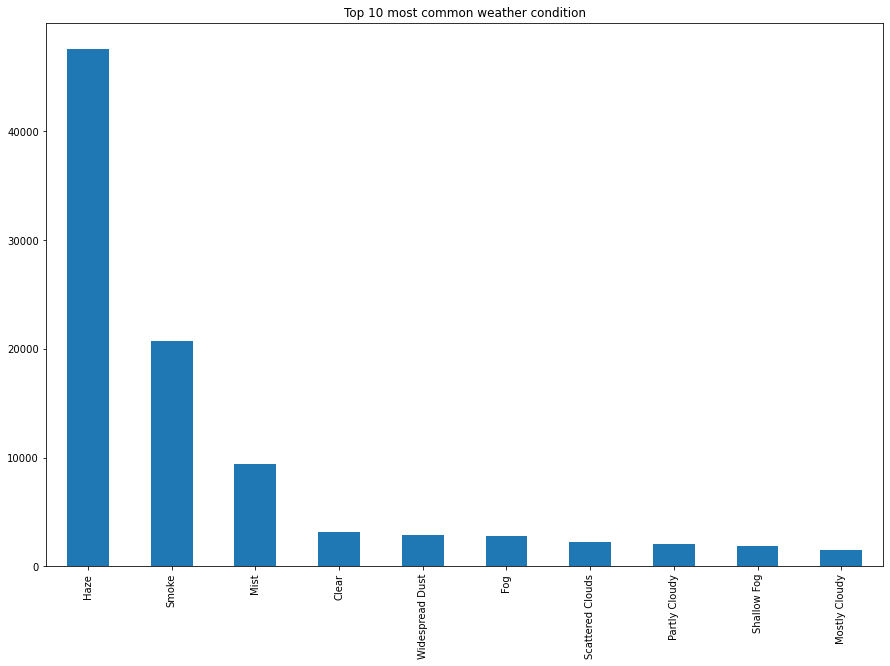

In [10]:
plt.figure(figsize=(15, 10));
df._conds.value_counts().head(10).plot(kind='bar');
plt.title("Top 10 most common weather condition")
plt.plot();

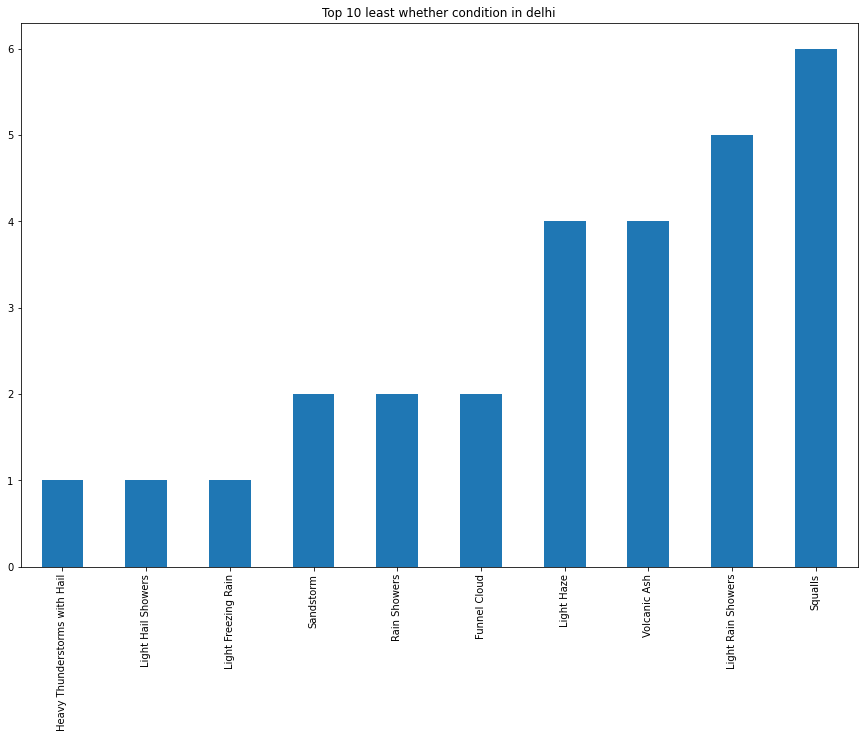

In [11]:
plt.figure(figsize=(15, 10));
df._conds.value_counts(ascending=True).head(10).plot(kind="bar");
plt.title("Top 10 least whether condition in delhi");
plt.plot();

In [12]:
df._wdire.value_counts()

North       19034
West        11888
WNW          7464
East         7233
NW           7117
WSW          5466
ESE          5336
ENE          3721
SE           3513
SW           3200
NNW          2696
NE           2500
SSE          2052
NNE          1752
SSW          1715
South        1543
Variable        5
Name: _wdire, dtype: int64

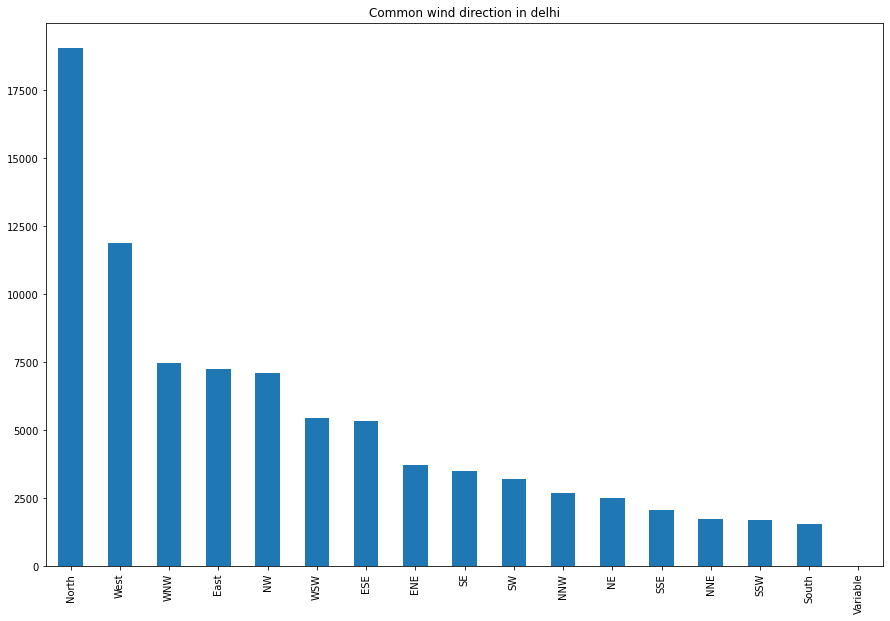

In [13]:
plt.figure(figsize=(15, 10));
plt.title("Common wind direction in delhi");
df._wdire.value_counts().plot(kind="bar");
plt.plot();

In [14]:
print("average temprature in delhi:", round(df._tempm.mean(axis=0),2))

average temprature in delhi: 25.45


In [15]:
def extract_year(value):
    return (value[0:4])

In [16]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [17]:
def extract_month(value):
    return (value[4:6])

In [18]:
df["year"] = df["datetime_utc"].apply(lambda x:extract_year(x))
df["month"] = df["datetime_utc"].apply(lambda x:extract_month(x))

In [19]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,...,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm,year,month
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,...,0,0,5.0,280.0,West,NaN,NaN,7.4,1996,11
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,...,0,0,NaN,0.0,North,NaN,NaN,NaN,1996,11
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,...,0,0,NaN,0.0,North,NaN,NaN,NaN,1996,11
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,...,0,0,2.0,0.0,North,NaN,NaN,NaN,1996,11
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,...,0,0,1.2,0.0,North,NaN,NaN,0.0,1996,11


In [20]:
print("max, min: ", df.year.max(), ",", df.year.min())

max, min:  2017 , 1996


In [21]:
df.year.value_counts()

2003    13186
2004     9151
2002     8503
2001     8403
2016     6634
1997     6513
1999     6300
2000     5391
1998     3579
2014     2973
2015     2936
2005     2920
2007     2865
2006     2858
2008     2857
2009     2851
2010     2768
2011     2738
2012     2438
2013     2428
2017     1420
1996     1278
Name: year, dtype: int64

In [22]:
df.groupby("year")._tempm.mean()

year
1996    16.518636
1997    24.444635
1998    24.847371
1999    27.335731
2000    23.865647
2001    25.582460
2002    26.481948
2003    26.176556
2004    26.004396
2005    24.712715
2006    25.449245
2007    24.800211
2008    24.525744
2009    25.355360
2010    25.553338
2011    24.966362
2012    25.024661
2013    24.679222
2014    25.175735
2015    25.141832
2016    27.315734
2017    20.204369
Name: _tempm, dtype: float64

In [23]:
df_mean = df.groupby("year")._tempm.mean().reset_index().sort_values('_tempm', ascending=True)

In [24]:
df_mean.dtypes

year       object
_tempm    float64
dtype: object

In [25]:
df_mean.year = df_mean.year.astype("float")

In [26]:
df_mean.dtypes

year      float64
_tempm    float64
dtype: object

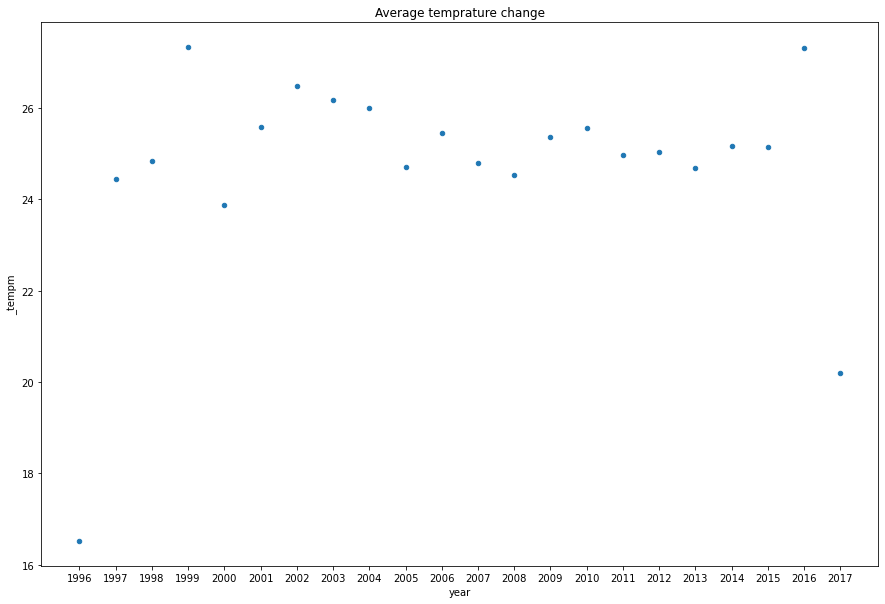

In [27]:
df_mean.plot(kind="scatter", x="year", y="_tempm", figsize=(15, 10))

plt.xticks(df_mean.year);
plt.title("Average temprature change");
plt.plot();

In [28]:
df.isnull().sum()

datetime_utc         0
_conds              72
_dewptm            621
_fog                 0
_hail                0
_heatindexm      71835
_hum               757
_precipm        100990
_pressurem         232
_rain                0
_snow                0
_tempm             673
_thunder             0
_tornado             0
_vism             4428
_wdird           14755
_wdire           14755
_wgustm          99918
_windchillm     100411
_wspdm            2358
year                 0
month                0
dtype: int64

In [29]:
df.columns

Index(['datetime_utc', '_conds', '_dewptm', '_fog', '_hail', '_heatindexm',
       '_hum', '_precipm', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wdire', '_wgustm',
       '_windchillm', '_wspdm', 'year', 'month'],
      dtype='object')

In [30]:
df_filtered = df[['datetime_utc', '_conds', '_dewptm', '_fog', '_hail',
       '_hum', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wdire'
       , '_wspdm', 'year', "month"]]

In [31]:
df_filtered[df_filtered._dewptm.isnull()]

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month
124,19961108-01:00,Smoke,NaN,0,0,NaN,1014.0,0,0,NaN,0,0,2.0,0.0,North,0.0,1996,11
240,19961113-02:00,Smoke,NaN,0,0,NaN,1012.0,0,0,NaN,0,0,NaN,280.0,West,5.6,1996,11
303,19961116-06:00,Unknown,NaN,0,0,NaN,-9999.0,0,0,NaN,0,0,NaN,0.0,North,NaN,1996,11
520,19961126-04:00,Smoke,NaN,0,0,NaN,1017.0,0,0,NaN,0,0,1.6,0.0,North,0.0,1996,11
584,19961129-18:00,Smoke,NaN,0,0,NaN,-9999.0,0,0,NaN,0,0,0.7,0.0,North,0.0,1996,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96965,20160907-08:30,Haze,NaN,0,0,NaN,1005.0,0,0,NaN,0,0,4.5,320.0,NW,9.3,2016,09
97259,20160924-12:30,Haze,NaN,0,0,NaN,1002.0,0,0,NaN,0,0,3.0,0.0,North,0.0,2016,09
98049,20161025-07:30,Widespread Dust,NaN,0,0,NaN,1009.0,0,0,NaN,0,0,3.5,280.0,West,14.8,2016,10
99347,20161221-05:30,Haze,NaN,0,0,NaN,1018.0,0,0,NaN,0,0,3.0,270.0,West,11.1,2016,12


In [32]:
for index,row in df_filtered[df_filtered._dewptm.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._dewptm.mean()
    df_filtered.at[index, "_dewptm"] = mean_val
    

In [33]:
df_filtered[df_filtered._dewptm.isnull()]

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month


In [34]:
df_filtered.shape

(100990, 18)

In [35]:
df_filtered.isnull().sum()

datetime_utc        0
_conds             72
_dewptm             0
_fog                0
_hail               0
_hum              757
_pressurem        232
_rain               0
_snow               0
_tempm            673
_thunder            0
_tornado            0
_vism            4428
_wdird          14755
_wdire          14755
_wspdm           2358
year                0
month               0
dtype: int64

In [36]:
df_filtered[df_filtered._hum.isnull()]


,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month
124,19961108-01:00,Smoke,5.992851,0,0,NaN,1014.0,0,0,NaN,0,0,2.00,0.0,North,0.0,1996,11
240,19961113-02:00,Smoke,5.992851,0,0,NaN,1012.0,0,0,NaN,0,0,NaN,280.0,West,5.6,1996,11
303,19961116-06:00,Unknown,5.992851,0,0,NaN,-9999.0,0,0,NaN,0,0,NaN,0.0,North,NaN,1996,11
520,19961126-04:00,Smoke,5.992851,0,0,NaN,1017.0,0,0,NaN,0,0,1.60,0.0,North,0.0,1996,11
584,19961129-18:00,Smoke,5.992851,0,0,NaN,-9999.0,0,0,NaN,0,0,0.70,0.0,North,0.0,1996,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98641,20161117-07:30,Unknown,10.000000,0,0,NaN,1017.0,0,0,NaN,0,0,NaN,0.0,North,NaN,2016,11
99268,20161217-09:00,Smoke,11.000000,0,0,NaN,1016.0,0,0,NaN,0,0,1.00,20.0,NNE,25.9,2016,12
99347,20161221-05:30,Haze,18.274320,0,0,NaN,1018.0,0,0,NaN,0,0,3.00,270.0,West,11.1,2016,12
99567,20161231-15:00,NaN,13.000000,0,0,NaN,1016.0,0,0,NaN,0,0,0.05,10.0,North,59.3,2016,12


In [37]:
for index,row in df_filtered[df_filtered._hum.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._hum.mean()
    df_filtered.at[index, "_hum"] = mean_val

In [38]:
df_filtered[df_filtered._hum.isnull()]

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month


In [39]:
df_filtered.isnull().sum()

datetime_utc        0
_conds             72
_dewptm             0
_fog                0
_hail               0
_hum                0
_pressurem        232
_rain               0
_snow               0
_tempm            673
_thunder            0
_tornado            0
_vism            4428
_wdird          14755
_wdire          14755
_wspdm           2358
year                0
month               0
dtype: int64

In [40]:
df_filtered[df_filtered._pressurem.isnull()]

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month
60703,20040625-21:00,Haze,21.0,0,0,62.0,NaN,0,0,26.0,0,0,2.0,NaN,NaN,0.0,2004,06
60723,20040628-09:00,Haze,20.0,0,0,27.0,NaN,0,0,37.0,0,0,4.0,0.0,North,3.7,2004,06
60728,20040629-00:00,Haze,21.0,0,0,63.0,NaN,0,0,27.0,0,0,2.0,NaN,NaN,0.0,2004,06
60921,20040723-09:00,Haze,24.0,0,0,37.0,NaN,0,0,37.0,0,0,2.0,NaN,NaN,0.0,2004,07
61255,20040829-18:00,Haze,27.0,0,0,75.0,NaN,0,0,31.0,0,0,2.0,NaN,NaN,0.0,2004,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96567,20160821-00:00,Mist,25.0,0,0,81.0,NaN,0,0,28.0,0,0,2.0,110.0,ESE,9.3,2016,08
96907,20160902-18:00,Mist,25.0,0,0,79.0,NaN,0,0,28.0,0,0,2.0,270.0,West,7.4,2016,09
98402,20161108-06:00,Smoke,14.0,0,0,39.0,NaN,0,0,25.0,0,0,1.0,270.0,West,22.2,2016,11
98820,20161126-09:00,Haze,8.0,0,0,15.0,NaN,0,0,30.0,0,0,4.0,290.0,WNW,14.8,2016,11


In [41]:
df_filtered.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month
0,19961101-11:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4,1996,11
1,19961101-12:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,1996,11
2,19961101-13:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,1996,11
3,19961101-14:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,1996,11
4,19961101-16:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0,1996,11


In [43]:
df_filtered.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm,year,month
0,19961101-11:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4,1996,11
1,19961101-12:00,Smoke,10.0,0,0,32.0,NaN,0,0,28.0,0,0,NaN,0.0,North,NaN,1996,11
2,19961101-13:00,Smoke,11.0,0,0,44.0,NaN,0,0,24.0,0,0,NaN,0.0,North,NaN,1996,11
3,19961101-14:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,1996,11
4,19961101-16:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0,1996,11


In [44]:
df_filtered._pressurem.isnull().sum()

983

In [45]:
for index,row in df_filtered[df_filtered._pressurem.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._pressurem.mean()
    df_filtered.at[index, "_pressurem"] = mean_val

In [46]:
df_filtered.isnull().sum()

datetime_utc        0
_conds             72
_dewptm             0
_fog                0
_hail               0
_hum                0
_pressurem          0
_rain               0
_snow               0
_tempm            673
_thunder            0
_tornado            0
_vism            4428
_wdird          14755
_wdire          14755
_wspdm           2358
year                0
month               0
dtype: int64

In [59]:
for index,row in df_filtered[df_filtered._tempm.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._tempm.mean()
    df_filtered.at[index, "_tempm"] = mean_val
    

In [60]:
for index,row in df_filtered[df_filtered._vism.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._vism.mean()
    df_filtered.at[index, "_vism"] = mean_val

In [61]:
for index,row in df_filtered[df_filtered._wdird.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._wdird.mean()
    df_filtered.at[index, "_wdird"] = mean_val


In [62]:
for index,row in df_filtered[df_filtered._wspdm.isnull()].iterrows():
    mean_val = df_filtered[df_filtered["year"] == row["year"]]._wspdm.mean()
    df_filtered.at[index, "_wspdm"] = mean_val


In [63]:
df_filtered.isnull().sum()

datetime_utc     0
_conds          72
_dewptm          0
_fog             0
_hail            0
_hum             0
_pressurem       0
_rain            0
_snow            0
_tempm           0
_thunder         0
_tornado         0
_vism            0
_wdird           0
_wdire           0
_wspdm           0
year             0
month            0
dtype: int64

In [64]:
for index,row in df_filtered[df_filtered._wdire.isnull()].iterrows():
    most_frequent = df_filtered[df_filtered["year"] == row["year"]]._wdire.value_counts().idxmax()
    df_filtered.at[index, "_wdire"] = most_frequent

In [65]:
df_filtered.isnull().sum()

datetime_utc     0
_conds          72
_dewptm          0
_fog             0
_hail            0
_hum             0
_pressurem       0
_rain            0
_snow            0
_tempm           0
_thunder         0
_tornado         0
_vism            0
_wdird           0
_wdire           0
_wspdm           0
year             0
month            0
dtype: int64

In [67]:
for index,row in df_filtered[df_filtered._conds.isnull()].iterrows():
    most_frequent = df_filtered[df_filtered["year"] == row["year"]]._conds.value_counts().idxmax()
    df_filtered.at[index, "_conds"] = most_frequent

In [68]:
df_filtered.isnull().sum()

datetime_utc    0
_conds          0
_dewptm         0
_fog            0
_hail           0
_hum            0
_pressurem      0
_rain           0
_snow           0
_tempm          0
_thunder        0
_tornado        0
_vism           0
_wdird          0
_wdire          0
_wspdm          0
year            0
month           0
dtype: int64

In [70]:
df_filtered.dtypes

datetime_utc     object
_conds           object
_dewptm         float64
_fog              int64
_hail             int64
_hum            float64
_pressurem      float64
_rain             int64
_snow             int64
_tempm          float64
_thunder          int64
_tornado          int64
_vism           float64
_wdird          float64
_wdire           object
_wspdm          float64
year             object
month            object
dtype: object

In [71]:
pd.crosstab(df_filtered.year, [df_filtered.month], values=df_filtered._tempm, aggfunc="mean")

month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.415046,13.865403
1997,13.048083,15.825284,21.173384,26.300805,29.900929,31.735553,31.076391,29.450078,29.695443,24.130558,19.957239,13.698195
1998,13.144290,16.510567,19.882767,28.698630,33.991784,32.450593,29.923938,29.179850,29.119385,25.276475,20.306736,14.682166
1999,12.594269,16.743446,22.465106,31.419503,34.269136,34.281680,31.998110,32.903209,30.738490,27.700867,22.663247,15.271864
2000,13.803659,15.104891,NaN,35.000000,26.000000,32.442863,30.245092,31.881618,30.125521,28.188217,22.112297,16.154194
2001,12.658686,18.287586,23.564530,29.666763,32.988538,30.981903,30.912933,31.112729,31.174088,27.831502,21.620347,15.959586
2002,14.277785,17.470228,24.534641,32.058416,35.373743,34.219867,35.355093,30.697186,28.428300,27.166094,21.377793,16.904873
2003,11.931473,17.958429,23.538990,31.716751,34.950594,35.455894,30.293639,29.966644,28.951836,26.453855,20.371110,15.211904
2004,13.232766,18.734445,26.633420,31.858427,34.314077,33.072721,32.657179,29.602128,29.948052,24.262331,19.474359,15.534730


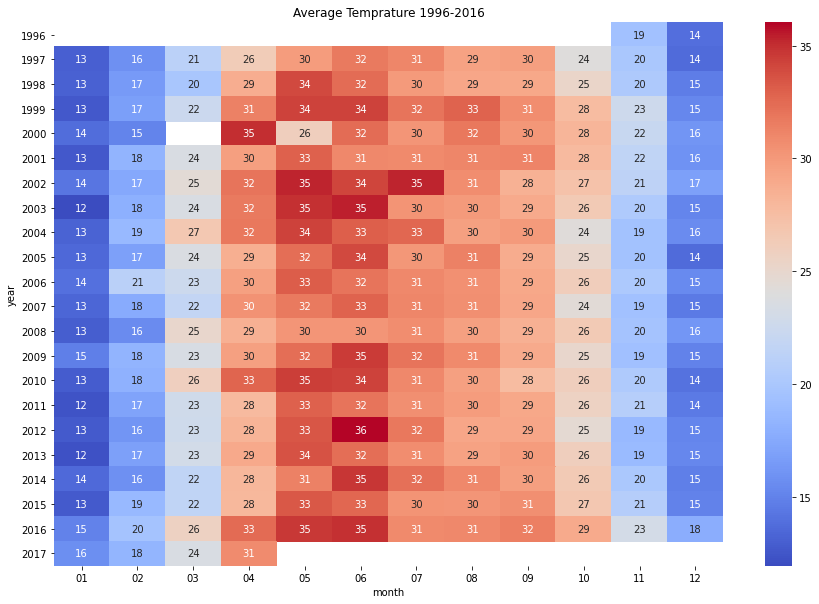

In [72]:
plt.figure(figsize=(15, 10));
sns.heatmap(pd.crosstab(df_filtered.year, [df_filtered.month], values=df_filtered._tempm, aggfunc="mean"),
            cmap="coolwarm", annot=True, cbar=True);
plt.title("Average Temprature 1996-2016")
plt.plot();

In [73]:
df_filtered._conds.value_counts()

Haze                             47674
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Thunderstorm                  64
Light Fog                           64
Heavy Rain               

In [74]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [75]:
df_filtered.columns

Index(['datetime_utc', '_conds', '_dewptm', '_fog', '_hail', '_hum',
       '_pressurem', '_rain', '_snow', '_tempm', '_thunder', '_tornado',
       '_vism', '_wdird', '_wdire', '_wspdm', 'year', 'month'],
      dtype='object')

In [76]:
feature_columns = ['_wdire', '_dewptm', '_fog', '_hail', '_hum',
       '_pressurem', '_rain', '_snow', '_tempm', '_thunder', '_tornado',
       '_vism', '_wdird', '_wspdm', 'year', 'month', '_conds']

In [77]:
df_final = df_filtered[feature_columns]

In [78]:
df_final.head()

,_wdire,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wspdm,year,month,_conds
0,West,9.0,0,0,27.0,1010.000000,0,0,30.0,0,0,5.000000,280.0,7.400000,1996,11,Smoke
1,North,10.0,0,0,32.0,1015.429612,0,0,28.0,0,0,2.198981,0.0,5.052735,1996,11,Smoke
2,North,11.0,0,0,44.0,1015.429612,0,0,24.0,0,0,2.198981,0.0,5.052735,1996,11,Smoke
3,North,10.0,0,0,41.0,1010.000000,0,0,24.0,0,0,2.000000,0.0,5.052735,1996,11,Smoke
4,North,11.0,0,0,47.0,1011.000000,0,0,23.0,0,0,1.200000,0.0,0.000000,1996,11,Smoke


In [79]:
df_final.dtypes

_wdire         object
_dewptm       float64
_fog            int64
_hail           int64
_hum          float64
_pressurem    float64
_rain           int64
_snow           int64
_tempm        float64
_thunder        int64
_tornado        int64
_vism         float64
_wdird        float64
_wspdm        float64
year           object
month          object
_conds         object
dtype: object

In [80]:
df_final._wdire.value_counts()

West        19970
North       19714
NW          13110
WNW          7464
East         7233
WSW          5466
ESE          5336
ENE          3721
SE           3513
SW           3200
NNW          2696
NE           2500
SSE          2052
NNE          1752
SSW          1715
South        1543
Variable        5
Name: _wdire, dtype: int64

In [81]:
wdire_dummies = pd.get_dummies(df_final["_wdire"])

In [82]:
df_final = pd.concat([wdire_dummies, df_final], axis=1)

In [83]:
df_final.head()

,ENE,ESE,East,NE,NNE,NNW,NW,North,SE,SSE,...,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wspdm,year,month,_conds
0,0,0,0,0,0,0,0,0,0,0,...,0,30.0,0,0,5.000000,280.0,7.400000,1996,11,Smoke
1,0,0,0,0,0,0,0,1,0,0,...,0,28.0,0,0,2.198981,0.0,5.052735,1996,11,Smoke
2,0,0,0,0,0,0,0,1,0,0,...,0,24.0,0,0,2.198981,0.0,5.052735,1996,11,Smoke
3,0,0,0,0,0,0,0,1,0,0,...,0,24.0,0,0,2.000000,0.0,5.052735,1996,11,Smoke
4,0,0,0,0,0,0,0,1,0,0,...,0,23.0,0,0,1.200000,0.0,0.000000,1996,11,Smoke


In [84]:
df_final.columns

Index(['ENE', 'ESE', 'East', 'NE', 'NNE', 'NNW', 'NW', 'North', 'SE', 'SSE',
       'SSW', 'SW', 'South', 'Variable', 'WNW', 'WSW', 'West', '_wdire',
       '_dewptm', '_fog', '_hail', '_hum', '_pressurem', '_rain', '_snow',
       '_tempm', '_thunder', '_tornado', '_vism', '_wdird', '_wspdm', 'year',
       'month', '_conds'],
      dtype='object')

In [85]:
df_final.drop("_wdire", inplace=True, axis=1)

In [86]:
df_final.columns

Index(['ENE', 'ESE', 'East', 'NE', 'NNE', 'NNW', 'NW', 'North', 'SE', 'SSE',
       'SSW', 'SW', 'South', 'Variable', 'WNW', 'WSW', 'West', '_dewptm',
       '_fog', '_hail', '_hum', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wspdm', 'year', 'month',
       '_conds'],
      dtype='object')

In [87]:
X = df_final.iloc[:, 0:-1].values
X.shape

(100990, 32)

In [88]:
y = df_final.iloc[:, -1].values

In [89]:
label_encoder = LabelEncoder()

In [90]:
y = label_encoder.fit_transform(y)

In [91]:
y.shape

(100990,)

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [94]:
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (75742, 32)
Shape of X_test (25248, 32)
Shape of y_train (75742,)
Shape of y_test (25248,)


In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=0)

In [97]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [98]:
y_pred = clf.predict(X_test)

In [99]:
y_pred

array([ 5,  5, 31, ..., 15, 24, 20])

In [100]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.7853691381495564
